In [42]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 26.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.4 MB/s eta 0:00:00


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

industry_data = pd.read_csv('datasets/industry_data.csv',index_col=0).transpose()
innovation_data = pd.read_csv('datasets/innovation_data.csv').fillna('None')
internal_data = pd.read_csv('datasets/internal_data.csv',index_col=0).transpose()

industry_data.head()

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML
DICE,NaN,NaN,NaN,NaN,NaN,Average,NaN,Strong,NaN,Strong,Good,Good,Good
MagICL,NaN,Average,NaN,Average,NaN,Average,NaN,NaN,Strong,NaN,NaN,NaN,Good
BioHIT,NaN,NaN,NaN,Strong,NaN,Good,NaN,NaN,NaN,Good,Average,Strong,Good
CAKT,NaN,Average,NaN,NaN,Good,Good,NaN,Good,NaN,Strong,Good,NaN,Strong
CER,Average,NaN,NaN,Good,NaN,Strong,NaN,NaN,NaN,NaN,Strong,Good,Strong


In [19]:
%matplotlib inline

In [228]:
innovation_data.head()

,Team,Field 1,Readiness,TRL 1,Demo 1,Field 2,Readiness.1,TRL 2,Demo 2,Field 3,...,Demo 4,Field 5,Readiness.4,TRL 5,Demo 5,Field 6,Readiness.5,TRL 6,Demo 6,Number of Demos
0,DICE,Mistatement Identification,Ongoing,1.0,None,Bankruptcy Prediction,Ongoing,2.0,Indentification of Going Concerns,None,...,None,None,None,None,None,None,None,None,None,1.0
1,MagCIL,Music Information Retrieval,Algorithms,None,None,Speech Analytics,Algorithms,None,None,Video Analysis,...,None,Sound Scene Recognition,Datasets,None,None,Soundscape Analysis,Datasets,None,None,None
2,BioHIT,Open Data Graph,None,None,None,DNA Sequences,None,None,None,Knowledge Graphs,...,None,None,None,None,None,None,None,None,None,None
3,CAKT,None,None,None,None,None,None,None,None,None,...,None,Clinical Data Prediction Models,None,None,None,None,None,None,None,None
4,CER,Maritime Situational Awareness,None,None,None,Fleet Management,None,None,None,Activity Recognition,...,None,None,None,None,None,None,None,None,None,4.0


In [102]:
internal_data.head()

,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations
DICE,Average,Good,Average,Good,Good,Good,Average
MagICL,Strong,Strong,Strong,Strong,Strong,Strong,Strong
BioHIT,Strong,Strong,Good,Good,Good,Good,Average
CAKT,Strong,Strong,Good,Strong,Strong,Strong,Strong
CER,Good,Good,Strong,NaN,Strong,Strong,NaN


In [20]:
mapping = {
    'Strong': 3,
    'Good': 2,
    'Average': 1,
    'None': 0
}

internal_columns = ['Funding', 'Application-Oriented', 'Demos', 'Industrial Collaborations', 'System Maturity', 'Number of Members', 'Academic Collaborations']

industry_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                                'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', ]

for column in internal_columns:
    if column in internal_data.columns:
        internal_data[column] = internal_data[column].map(mapping).fillna(0)

for column in industry_columns:
    if column in industry_data.columns:
        industry_data[column] = industry_data[column].map(mapping).fillna(0)

In [104]:
internal_data.head()

,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations
DICE,1.0,2.0,1,2.0,2.0,2.0,1.0
MagICL,3.0,3.0,3,3.0,3.0,3.0,3.0
BioHIT,3.0,3.0,2,2.0,2.0,2.0,1.0
CAKT,3.0,3.0,2,3.0,3.0,3.0,3.0
CER,2.0,2.0,3,0.0,3.0,3.0,0.0


In [78]:
industry_data.head()

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML
DICE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0
MagICL,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
BioHIT,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0
CAKT,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,3.0
CER,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0


In [21]:
from sklearn.preprocessing import StandardScaler
def scale_data(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_df

industry_data_s = scale_data(industry_data)
internal_data_s = scale_data(internal_data)

In [22]:
def create_heatmap(df):
    sns.heatmap(df, annot=True, cmap='viridis')
    plt.title("Heatmap of Raw Strengths of Data")
    plt.show()

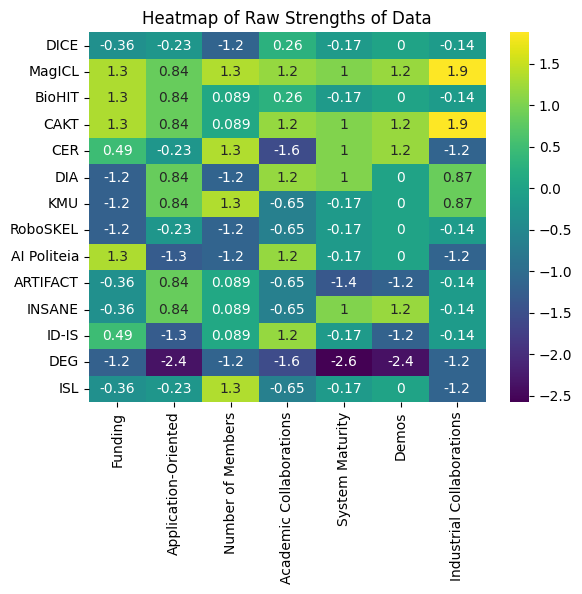

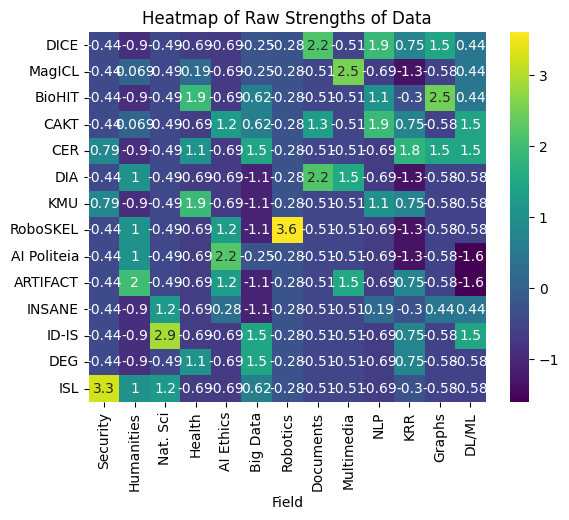

In [262]:
create_heatmap(internal_data_s)
create_heatmap(industry_data_s)

In [23]:
def create_correlation_matrix(df):
    correlation = df.corr()
    sns.heatmap(correlation, cmap='viridis')
    plt.title('Correlation Matrix')
    plt.show()

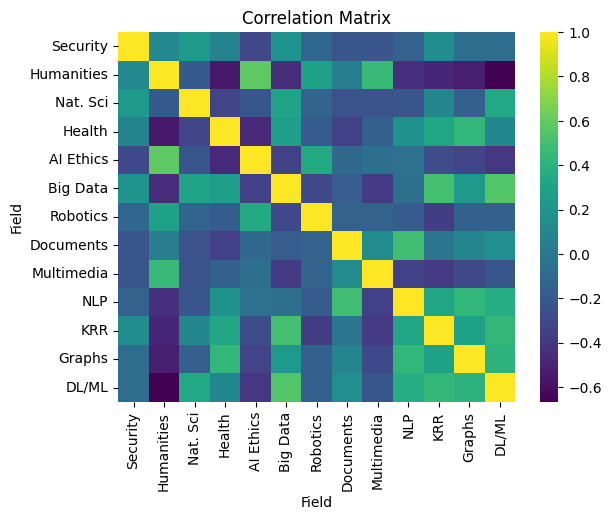

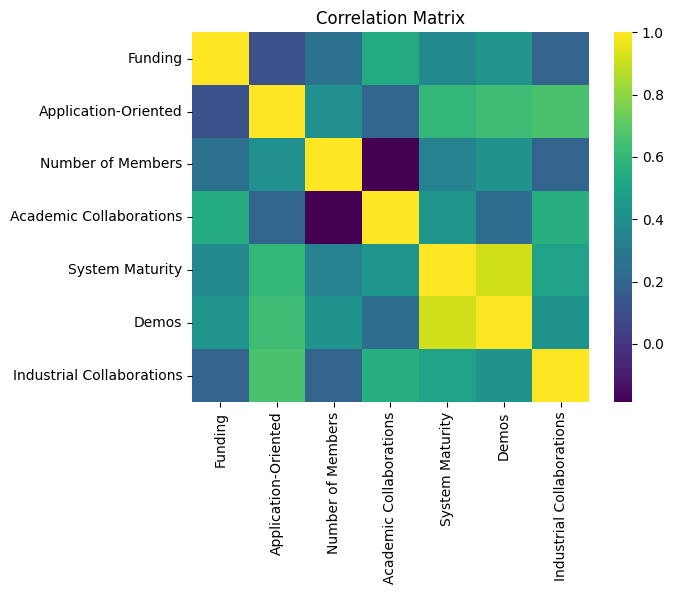

In [265]:
create_correlation_matrix(industry_data)
create_correlation_matrix(internal_data)

In [24]:
feature_weights = {
    'Demos': 1,
    'Industrial Collaborations': 1,
    'Academic Collaborations': 1,
    'Application-Oriented': 1,
    'System Maturity': 1,
    'Funding': 1,
    'Number of Members': 1,
}
def calculate_performance_score(row,weights):
        
    """
    Calculate a performance score for a given row based on the feature values and their corresponding weights.

    Parameters:
    - row (Series): A row of data from the DataFrame.
    - weights (dict): A dictionary where keys are feature names and values are the weights for those features.

    Returns:
    - score (int): The calculated performance score for the row.
    """
    score = 0
    for feature, weight in weights.items():
        if feature in row:
            score += weight * row[feature]
    return score

In [29]:
calculate_performance_score(internal_data, feature_weights)

DICE           11.0
MagICL         21.0
BioHIT         15.0
CAKT           20.0
CER            13.0
DIA            14.0
KMU            13.0
RoboSKEL        9.0
AI Politeia    12.0
ARTIFACT       10.0
INSANE         14.0
ID-IS          12.0
DEG             1.0
ISL            11.0
Name: Demos, dtype: float64

In [30]:
def plot_performance_score(df_int):
    df = df_int
    df_scored = df
    df_scored['Performance Score'] = df.apply(calculate_performance_score, axis=1, weights=feature_weights)
    df_scored.reset_index(inplace=True)
    df_scored.rename(columns={'index':'Team'},inplace='True')
         
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Team', y='Performance Score', hue='Team', data=df, palette='viridis', dodge=False, legend=False)
    plt.title('Team Performance Scores')
    plt.xlabel('Team')
    plt.ylabel('Performance Score')
    plt.xticks(rotation=45)
    plt.show()
    

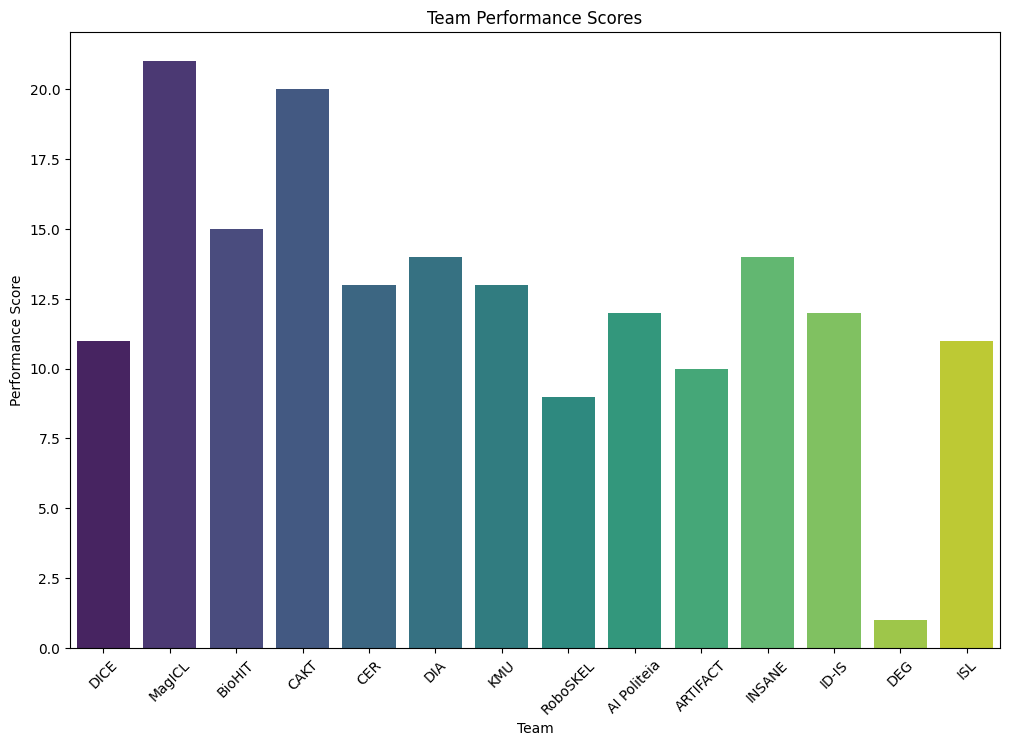

In [31]:
plot_performance_score(internal_data)

In [63]:
def plot_performance_distribution(df):
    """
    Plots a histogram of performance scores with a kernel density estimate (KDE).

    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data and performance scores.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Performance Score'], kde=True, color='blue')
    plt.title('Performance Score Distribution')
    plt.xlabel('Performance Score')
    plt.ylabel('Frequency')
    plt.show()

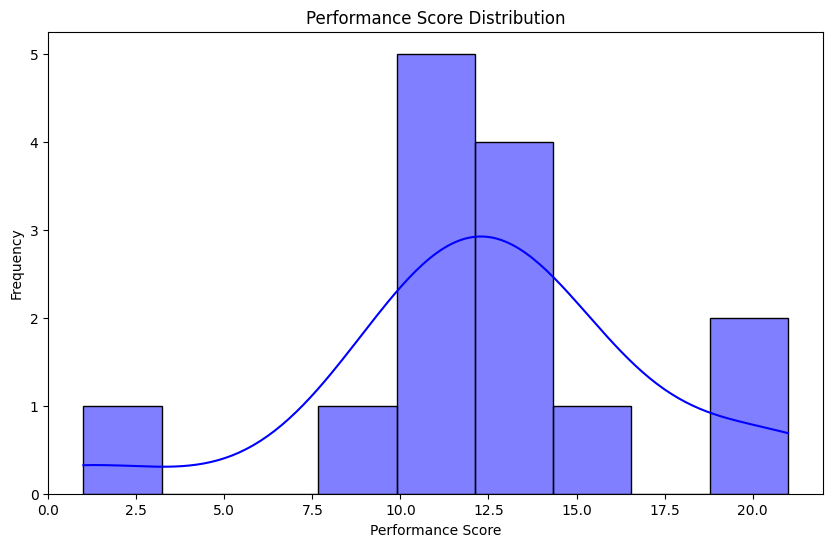

In [132]:
plot_performance_distribution(internal_data)

In [134]:
def create_box_plot(df):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,orient='h')
    plt.title('Distribution of Strength by Industry')
    plt.xlabel('Involvement Level')
    plt.ylabel('Industry')
    plt.show()


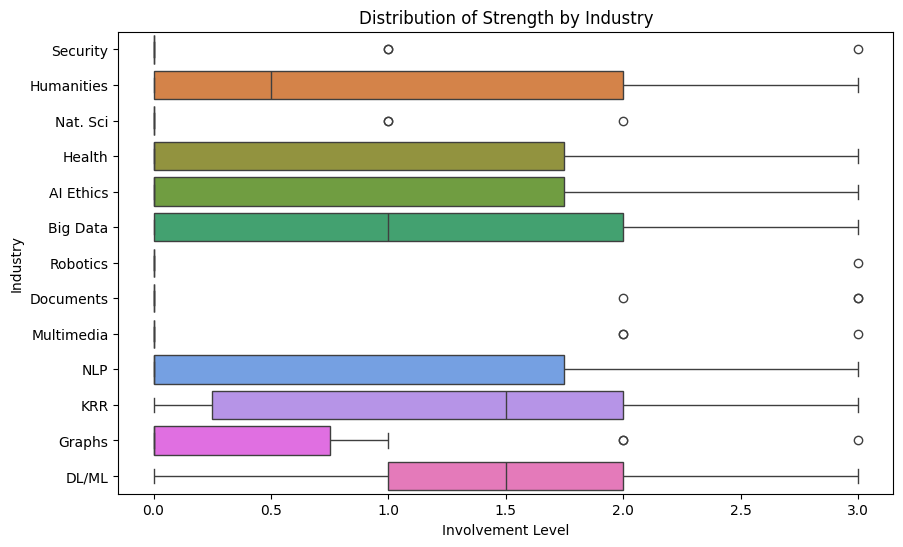

In [135]:
create_box_plot(industry_data)

In [65]:
def create_kde_plot(df):
    """
    This function creates a KDE plot for the distribution of involvement level by industry.
    
    Parameters:
    dfi (pd.DataFrame): The input DataFrame representing industry factors.
    
    Returns:
    fig_kde: A Plotly figure object representing the KDE plot.
    """
    plt.figure(figsize=(16,10))
    for column in df.columns:
        sns.kdeplot(df[column],label=column,fill=True)
    plt.title('Distribution of Involvement Level by Industry (KDE)')
    plt.xlabel('Involvement Level')
    plt.ylabel('Density')
    plt.legend(title='Industry')
    plt.show()

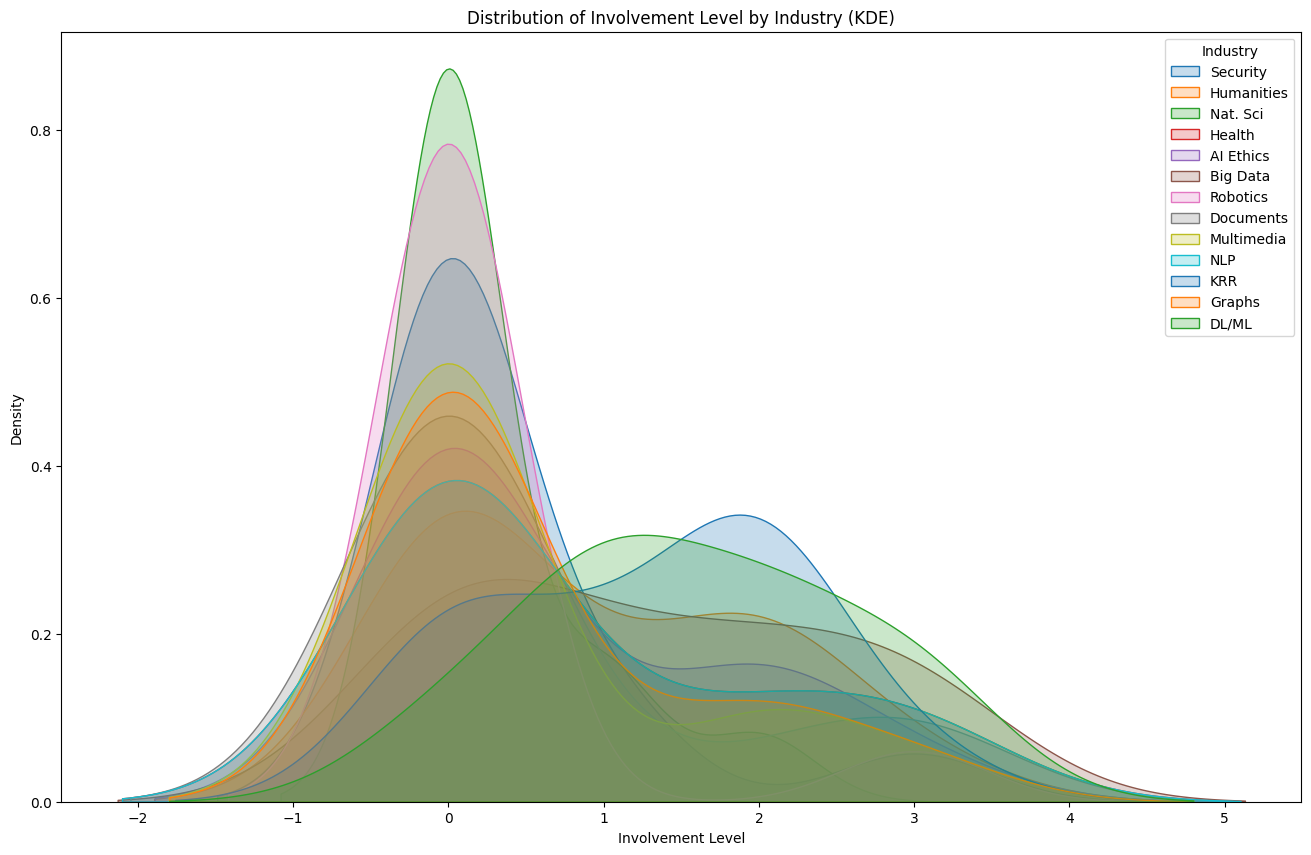

In [136]:
create_kde_plot(industry_data)

In [28]:
def create_histogram(df):
    """
    This function creates a combined histogram and KDE plot for the distribution of involvement level by industry.
    
    Parameters:
    dfi (pd.DataFrame): The input DataFrame representing industry factors.
    
    Returns:
    fig_hist_kde: A Plotly figure object representing the combined histogram and KDE plot.
    """
    for column in df.columns:
        sns.histplot(df[column],label=column,kde=True,element='step',fill=True)
    plt.title('Distribution of Involvement Level by Industry Strength')
    plt.xlabel('Involvement Level')
    plt.ylabel('Frequency')
    plt.legend(title='Industry')
    plt.show()
    


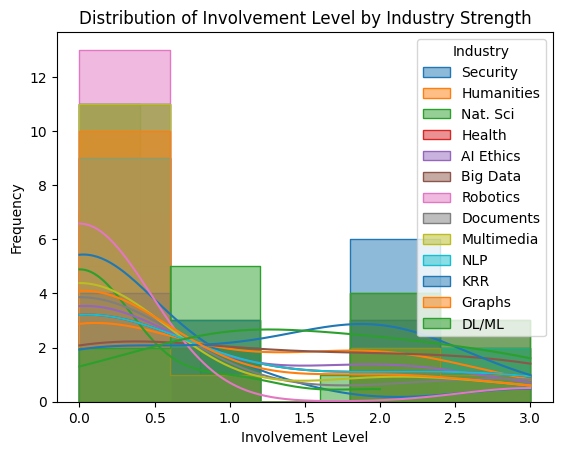

In [138]:
create_histogram(industry_data)

In [33]:
def clean_innovation_data(df):
    readiness_cols = [col for col in df.columns if 'Readiness' in col]
    
    df[readiness_cols] = df[readiness_cols].fillna('None')
    
    df = df.fillna('None')
    
    return df

In [34]:
clean_innovation_data(innovation_data)

,Team,Field 1,Readiness,TRL 1,Demo 1,Field 2,Readiness.1,TRL 2,Demo 2,Field 3,...,Demo 4,Field 5,Readiness.4,TRL 5,Demo 5,Field 6,Readiness.5,TRL 6,Demo 6,Number of Demos
0,DICE,Mistatement Identification,Ongoing,1.0,None,Bankruptcy Prediction,Ongoing,2.0,Indentification of Going Concerns,None,...,None,None,None,None,None,None,None,None,None,1.0
1,MagCIL,Music Information Retrieval,Algorithms,None,None,Speech Analytics,Algorithms,None,None,Video Analysis,...,None,Sound Scene Recognition,Datasets,None,None,Soundscape Analysis,Datasets,None,None,None
2,BioHIT,Open Data Graph,None,None,None,DNA Sequences,None,None,None,Knowledge Graphs,...,None,None,None,None,None,None,None,None,None,None
3,CAKT,None,None,None,None,None,None,None,None,None,...,None,Clinical Data Prediction Models,None,None,None,None,None,None,None,None
4,CER,Maritime Situational Awareness,None,None,None,Fleet Management,None,None,None,Activity Recognition,...,None,None,None,None,None,None,None,None,None,4.0
5,DIA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,KMU,IT Systems and Knowledge Management,None,None,None,Intelligent DSS,None,None,None,Security of Cloud-Based Services,...,None,Competency-Based Learning,None,None,None,None,None,None,None,None
7,RoboSKEL,ROS2 Training,None,None,None,Human Robot Collaboration,None,None,None,Cobot Demos,...,None,UAV Demos,None,None,None,None,None,None,None,4.0
8,AI Politeia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,ARTIFACT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
def find_average_features(df):
     # Identify columns containing 'TRL'
    trl_cols = [col for col in df.columns if 'TRL' in col]
    if trl_cols:
        # Convert TRL columns to numeric (errors='coerce' will turn non-numeric values into NaN)
        df[trl_cols] = df[trl_cols].apply(pd.to_numeric, errors='coerce')
        df['Average TRL'] = df[trl_cols].mean(axis=1)
    else:
        df['Average TRL'] = None
    
    # Identify columns containing 'Field'
    field_cols = [col for col in df.columns if 'Field' in col]
    if field_cols:
        df['Number of Fields'] = (df[field_cols] != 'None').sum(axis=1)
    else:
        df['Number of Fields'] = 0
    
    return df

In [36]:
find_average_features(innovation_data)

,Team,Field 1,Readiness,TRL 1,Demo 1,Field 2,Readiness.1,TRL 2,Demo 2,Field 3,...,Readiness.4,TRL 5,Demo 5,Field 6,Readiness.5,TRL 6,Demo 6,Number of Demos,Average TRL,Number of Fields
0,DICE,Mistatement Identification,Ongoing,1.0,None,Bankruptcy Prediction,Ongoing,2.0,Indentification of Going Concerns,None,...,None,NaN,None,None,None,NaN,None,1.0,1.5,2
1,MagCIL,Music Information Retrieval,Algorithms,NaN,None,Speech Analytics,Algorithms,NaN,None,Video Analysis,...,Datasets,NaN,None,Soundscape Analysis,Datasets,NaN,None,None,NaN,6
2,BioHIT,Open Data Graph,None,NaN,None,DNA Sequences,None,NaN,None,Knowledge Graphs,...,None,NaN,None,None,None,NaN,None,None,NaN,4
3,CAKT,None,None,NaN,None,None,None,NaN,None,None,...,None,NaN,None,None,None,NaN,None,None,NaN,1
4,CER,Maritime Situational Awareness,None,NaN,None,Fleet Management,None,NaN,None,Activity Recognition,...,None,NaN,None,None,None,NaN,None,4.0,NaN,4
5,DIA,None,None,NaN,None,None,None,NaN,None,None,...,None,NaN,None,None,None,NaN,None,None,NaN,0
6,KMU,IT Systems and Knowledge Management,None,NaN,None,Intelligent DSS,None,NaN,None,Security of Cloud-Based Services,...,None,NaN,None,None,None,NaN,None,None,NaN,5
7,RoboSKEL,ROS2 Training,None,NaN,None,Human Robot Collaboration,None,NaN,None,Cobot Demos,...,None,NaN,None,None,None,NaN,None,4.0,NaN,5
8,AI Politeia,None,None,NaN,None,None,None,NaN,None,None,...,None,NaN,None,None,None,NaN,None,None,NaN,0
9,ARTIFACT,None,None,NaN,None,None,None,NaN,None,None,...,None,NaN,None,None,None,NaN,None,None,NaN,0


In [37]:
def plot_number_of_fields(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Number of Fields'], bins=range(df['Number of Fields'].min(), df['Number of Fields'].max() + 2), edgecolor='black')
    plt.title('Distribution of Number of Fields per Team')
    plt.xlabel('Number of Fields')
    plt.ylabel('Count')
    plt.xticks(range(df['Number of Fields'].min(), df['Number of Fields'].max() + 1))
    plt.show()


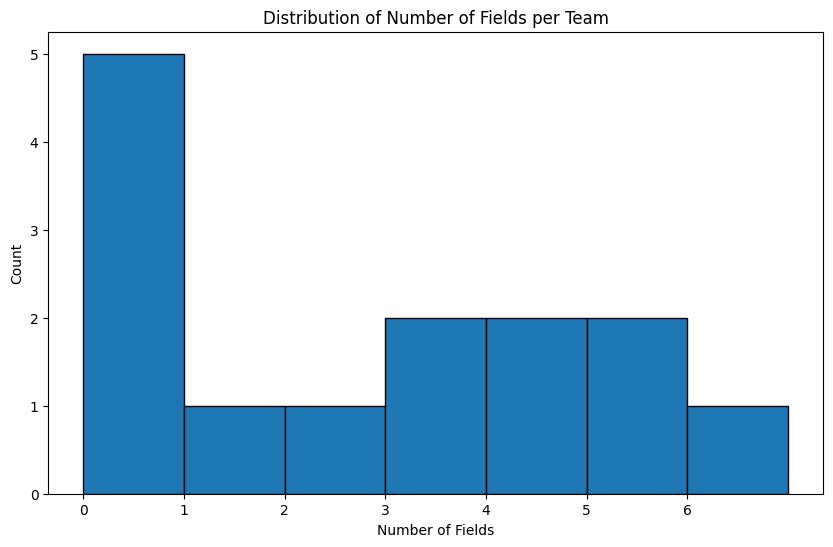

In [201]:
plot_number_of_fields(innovation_data)

In [44]:
from scipy.stats import gaussian_kde
def plot_average_trl(df):
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    data = df['Average TRL'].dropna()
    plt.hist(data, bins=10, edgecolor='black', alpha=0.7, density=True)
    
    # Calculate and plot KDE
    kde = gaussian_kde(data, bw_method=0.5)
    kde_xs = np.linspace(data.min(), data.max(), 100)
    plt.plot(kde_xs, kde(kde_xs), color='blue')
    
    plt.title('Distribution of Average TRL')
    plt.xlabel('Average TRL')
    plt.ylabel('Density')
    plt.show()

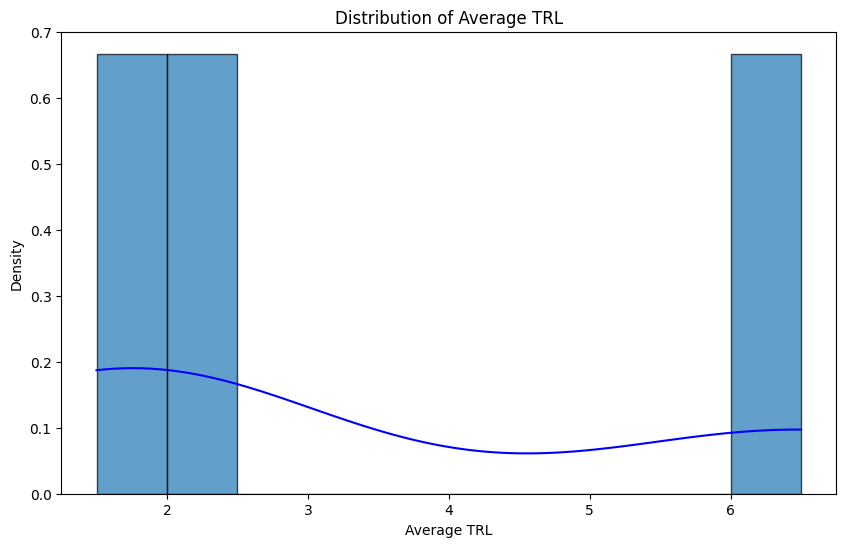

In [205]:
plot_average_trl(innovation_data)

In [45]:
def plot_trl_distribution(df):
    # Identify TRL columns (excluding 'Average TRL')
    trl_cols = [col for col in df.columns if 'TRL' in col and col != 'Average TRL']
    trl_data = df[trl_cols].melt(var_name='TRL Stage', value_name='TRL Value')
    
    # Drop NA values in TRL Value
    trl_data = trl_data.dropna(subset=['TRL Value'])

    plt.figure(figsize=(12, 8))
    plt.hist(trl_data['TRL Value'], bins=range(int(trl_data['TRL Value'].min()), int(trl_data['TRL Value'].max()) + 2), edgecolor='black', alpha=0.7)
    plt.title('Distribution of TRL Levels')
    plt.xlabel('TRL Value')
    plt.ylabel('Count')
    plt.show()


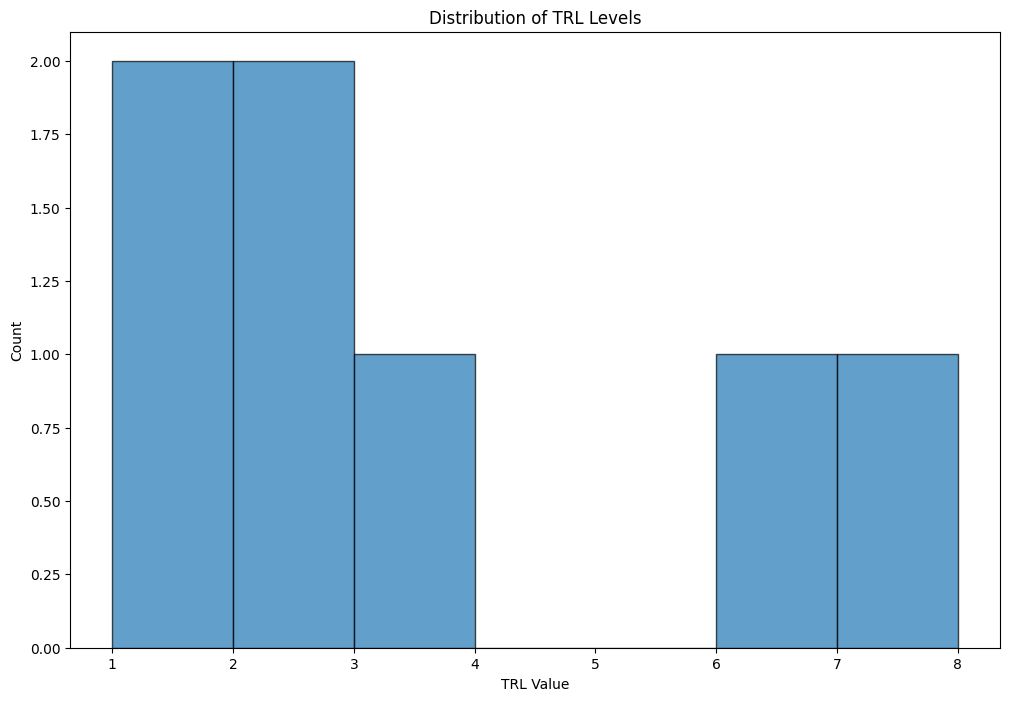

In [211]:
plot_trl_distribution(innovation_data)

In [46]:
def plot_readiness_counts(df):
    readiness_cols = [col for col in df.columns if 'Readiness' in col ]
    readiness_counts = df[readiness_cols].apply(pd.Series.value_counts).fillna(0).sum(axis=1)
    
    if 'None' in readiness_counts.index:
        readiness_counts = readiness_counts.drop('None')
        
    plt.figure(figsize=(8,6))
    readiness_counts.plot(kind='bar',color='blue')
    plt.title('Distribution of Readiness Level')
    plt.xlabel('Readiness')
    plt.ylabel('Count')
    plt.show()


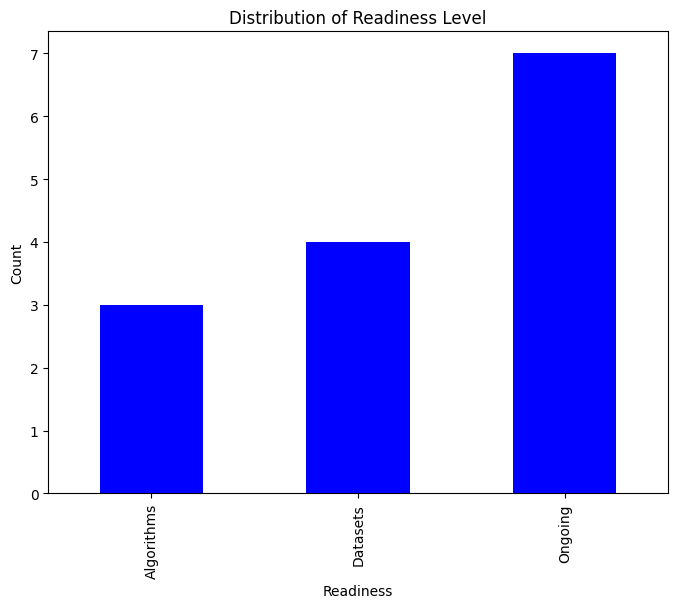

In [253]:
plot_readiness_counts(innovation_data)

In [216]:
def plot_number_of_demos(df):
    # Replace 'None' with 0 and convert the column to integers explicitly
    df['Number of Demos'] = df['Number of Demos'].replace('None', 0).astype(int, errors='ignore')
    
    plt.figure(figsize=(10, 6))
    plt.hist(df['Number of Demos'], bins=range(df['Number of Demos'].min(), df['Number of Demos'].max() + 2), edgecolor='black', alpha=0.7)
    plt.title('Number of Demos')
    plt.xlabel('Number of Demos')
    plt.ylabel('Count')
    plt.show()

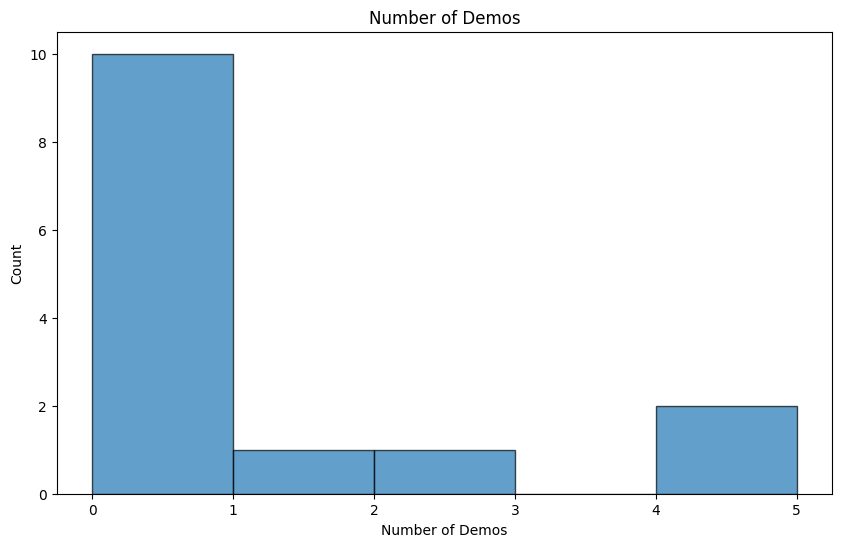

In [217]:
plot_number_of_demos(innovation_data)

In [47]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import base64
import io
import webbrowser

In [56]:
# Define the Dash app

def create_heatmap(df):
    fig = px.imshow(df, text_auto=True, aspect="auto", color_continuous_scale='viridis')
    fig.update_layout(title="Heatmap of Raw Strengths of Data")
    return fig

def create_correlation_matrix(df):
    correlation = df.corr()
    fig = ff.create_annotated_heatmap(
        z=correlation.values,
        x=list(correlation.columns),
        y=list(correlation.index),
        colorscale='Viridis',
        annotation_text=correlation.round(2).values,
        showscale=True
    )
    fig.update_layout(title='Correlation Matrix')
    return fig

# Function to create box plot using Plotly
def create_box_plot(df):
    fig = px.box(df, orientation='h', title='Distribution of Strength by Industry')
    fig.update_layout(
        xaxis_title='Involvement Level',
        yaxis_title='Industry',
        boxmode='group' # ensures that multiple traces are displayed side by side
    )
    return fig

def create_kde_plot(df):
    fig = go.Figure()
    for column in df.columns:
        fig.add_trace(go.Scatter(
            x=df[column],
            y=df[column].value_counts().sort_index(),
            mode='lines',
            name=column,
            fill='tozeroy'
        ))
    fig.update_layout(
        title='Distribution of Involvement Level by Industry (KDE)',
        xaxis_title='Involvement Level',
        yaxis_title='Density',
        legend_title='Industry'
    )
    return fig

def create_histogram(df):
    hist_data = [df[column].dropna().values for column in df.columns]
    group_labels = df.columns.tolist()

    # Create distplot with custom bin_size
    fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5, show_hist=True, show_rug=False)
    fig.update_layout(
        title='Distribution of Involvement Level by Industry Strength',
        xaxis_title='Involvement Level',
        yaxis_title='Frequency',
        barmode='overlay',
        legend_title='Industry'
    )
    return fig

def plot_number_of_fields(df):
    fig = px.histogram(df, x='Number of Fields', nbins=20, title='Distribution of Number of Fields per Team')
    fig.update_layout(
        xaxis_title='Number of Fields',
        yaxis_title='Count',
        bargap=0.2
    )
    return fig

def plot_average_trl(df):
    data = df['Average TRL'].dropna()
    kde = gaussian_kde(data, bw_method=0.5)
    kde_xs = np.linspace(data.min(), data.max(), 100)

    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=data,
        histnorm='probability density',
        nbinsx=10,
        name='Histogram',
        marker_color='blue',
        opacity=0.6
    ))
    fig.add_trace(go.Scatter(
        x=kde_xs,
        y=kde(kde_xs),
        mode='lines',
        name='KDE',
        line=dict(color='blue')
    ))
    fig.update_layout(
        title='Distribution of Average TRL',
        xaxis_title='Average TRL',
        yaxis_title='Density'
    )
    return fig

def plot_readiness_counts(df):
    readiness_cols = [col for col in df.columns if 'Readiness' in col]
    readiness_counts = df[readiness_cols].apply(pd.Series.value_counts).fillna(0).sum(axis=1)
    if 'None' in readiness_counts.index:
        readiness_counts = readiness_counts.drop('None')

    fig = px.bar(readiness_counts, x=readiness_counts.index, y=readiness_counts.values, title='Distribution of Readiness Level')
    fig.update_layout(
        xaxis_title='Readiness',
        yaxis_title='Count',
        bargap=0.2
    )
    return fig

def plot_performance_score(df):
    df_scored = df.copy()
    df_scored['Performance Score'] = df.apply(calculate_performance_score, axis=1, weights=feature_weights)
    df_scored.reset_index(inplace=True)
    df_scored.rename(columns={'index': 'Team'}, inplace=True)
    
    fig = px.bar(df_scored, x='Team', y='Performance Score', color='Team', title='Team Performance Scores', 
                 color_discrete_sequence=px.colors.sequential.Viridis)
    fig.update_layout(xaxis_title='Team', yaxis_title='Performance Score', xaxis_tickangle=-45)
    return fig

def plot_performance_distribution(df):
    """
    Plots a histogram of performance scores with a kernel density estimate (KDE).

    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data and performance scores.
    
    Returns:
    - fig: A Plotly figure object representing the performance score distribution.
    """
    df_scored = df.copy()
    df_scored['Performance Score'] = df.apply(calculate_performance_score, axis=1, weights=feature_weights)
    
    fig = px.histogram(df_scored, x='Performance Score', nbins=20, marginal='rug', title='Performance Score Distribution')
    fig.update_layout(xaxis_title='Performance Score', yaxis_title='Frequency')
    return fig


In [57]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Interactive Data Analysis Dashboard"), className="mb-4")
    ]),
    
    dbc.Row([
        dbc.Col(
            dcc.Dropdown(
                id='dataset-dropdown',
                options=[
                    {'label': 'Internal Data (Raw)', 'value': 'internal_raw'},
                    {'label': 'Industry Data (Raw)', 'value': 'industry_raw'},
                    {'label': 'Internal Data (Scaled)', 'value': 'internal_scaled'},
                    {'label': 'Industry Data (Scaled)', 'value': 'industry_scaled'},
                    {'label': 'Innovation Data (Features)', 'value': 'innovation_features'}
                ],
                value='internal_raw'
            ),
            width=6,
        ),
        dbc.Col(
            dcc.RadioItems(
                id='visualization-type',
                options=[
                    {'label': 'Heatmap', 'value': 'heatmap'},
                    {'label': 'Correlation Matrix', 'value': 'correlation'},
                    {'label': 'Box Plot (Industry Data Only)', 'value': 'boxplot'},
                    {'label': 'KDE Plot (Industry Data Only)', 'value': 'kdeplot'},
                    {'label': 'Histogram (Industry Data Only)', 'value': 'histogram'},
                    {'label': 'Number of Fields (Innovation Data Only)', 'value': 'number_of_fields'},
                    {'label': 'Average TRL (Innovation Data Only)', 'value': 'average_trl'},
                    {'label': 'Readiness Counts (Innovation Data Only)', 'value': 'readiness_counts'},
                    {'label': 'Performance Score (Internal Data Only)', 'value': 'performance_score'},
                    {'label': 'Performance Distribution (Internal Data Only)', 'value': 'performance_distribution'}
                ],
                value='heatmap',
                labelStyle={'display': 'inline-block'}
            ),
            width=6,
        ),
    ], className="mb-4"),
    
    dbc.Row([
        dbc.Col(dcc.Graph(id='visualization-graph'), width=12)
    ])
], fluid=True)

@app.callback(
    Output('visualization-graph', 'figure'),
    [Input('dataset-dropdown', 'value'),
     Input('visualization-type', 'value')]
)
def update_visualization(selected_dataset, visualization_type):
    if selected_dataset == 'internal_raw':
        data = internal_data
    elif selected_dataset == 'industry_raw':
        data = industry_data
    elif selected_dataset == 'internal_scaled':
        data = internal_data_s
    elif selected_dataset == 'industry_scaled':
        data = industry_data_s
    elif selected_dataset == 'innovation_features':
        data = innovation_data

    if visualization_type == 'heatmap':
        return create_heatmap(data)
    elif visualization_type == 'correlation':
        return create_correlation_matrix(data)
    elif visualization_type == 'boxplot' and 'industry' in selected_dataset:
        return create_box_plot(industry_data)
    elif visualization_type == 'kdeplot' and 'industry' in selected_dataset:
        return create_kde_plot(industry_data)
    elif visualization_type == 'histogram' and 'industry' in selected_dataset:
        return create_histogram(industry_data)
    elif visualization_type == 'number_of_fields' and selected_dataset == 'innovation_features':
        return plot_number_of_fields(data)
    elif visualization_type == 'average_trl' and selected_dataset == 'innovation_features':
        return plot_average_trl(data)
    elif visualization_type == 'readiness_counts' and selected_dataset == 'innovation_features':
        return plot_readiness_counts(data)
    elif visualization_type == 'performance_score' and selected_dataset == 'internal_raw':
        return plot_performance_score(internal_data)
    elif visualization_type == 'performance_distribution' and selected_dataset == 'internal_raw':
        return plot_performance_distribution(internal_data)
    else:
        return go.Figure()  # Return an empty figure for invalid combinations


if __name__ == '__main__':
    webbrowser.open_new("http://localhost:8050/")
    app.run_server(debug=True, use_reloader=False, port=8050)
    